In [ ]:
!pip install webdriver_manager

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
import json
from urllib.parse import urljoin


def scrape_mushroom_list(url):
    data = requests.get(url).text
    soup = BeautifulSoup(data, 'html.parser')

    # Trouver tous les liens vers les pages individuelles des champignons
    mushroom_links = soup.find_all('a', href=re.compile(r'/show\?n='))
    mushroom_urls = [urljoin('http://www.mushroom.world', link['href']) for link in mushroom_links]

    # Récupérer les informations pour chaque champignon
    mushrooms = [scrape_mushroom(link) for link in mushroom_urls]

    return mushrooms


def scrape_mushroom(url):
    data = requests.get(url).text
    soup = BeautifulSoup(data, 'html.parser')

    # Extraire les informations spécifiques pour un champignon individuel
    name_content = soup.find(class_="caption").find("b").contents
    names = re.sub('[^A-Za-z0-9( ]+', '', name_content[0]).split("(")
    names = [n.strip() for n in names]
    name1 = names[0]
    name2 = names[1] if len(names) > 1 else ''

    labels = soup.find_all(class_="labelus")
    labels = [label.contents[0] for label in labels]

    texts = soup.find_all(class_="textus")
    texts = [text.contents[0] for text in texts]

    # Updated code to remove unwanted lines
    description = soup.find(class_="longtextus")
    if description:
        unwanted_links = description.find_all('a', href=True)
        for link in unwanted_links:
            link.extract()  # Remove unwanted links

        description = description.get_text(separator=' ', strip=True)
    else:
        description = "Description not available"

    texts.append(description)
    assert len(labels) == len(texts)

    images = soup.find(id="mushroom-list").find_all(class_="image")
    image_urls = [urljoin('http://www.mushroom.world', image.a["href"]) for image in images]

    mushroom = dict(name1=name1, name2=name2, images=image_urls, info=dict())

    for i in range(len(labels)):
        mushroom["info"][labels[i]] = texts[i]

    return mushroom


if __name__ == '__main__':
    # Lien vers la liste de tous les champignons sur mushroom.world
    all_mushrooms_url = 'http://www.mushroom.world/mushrooms/namelist'

    # Récupérer les informations sur tous les champignons
    all_mushrooms = scrape_mushroom_list(all_mushrooms_url)

    # Dictionnaire de comestibilité
    edibility_dict = {
        # ... (your edibility dictionary remains unchanged)
          "Agaricus arvensis": "c",
  "Agaricus augustus": "c",
  "Agaricus campestris": "c",
  "Agaricus sylvicola": "c",
  "Agrocybe pediades": "c",
  "Agrocybe praecox": "c",
  "Albatrellus confluens": "p",
  "Albatrellus ovinus": "c",
  "Aleuria aurantia": "p",
  "Amanita battarrae": "p",
  "Amanita bisporigera": "p",
  "Amanita cokeri": "p",
  "Amanita fulva": "p",
  "Amanita jacksonii": "p",
  "Amanita muscaria": "p",
  "Amanita pantherina": "p",
  "Amanita phalloides": "p",
  "Amanita porphyria": "p",
  "Amanita regalis": "p",
  "Amanita rubescens": "c",
  "Amanita vaginata": "p",
  "Amanita virosa": "p",
  "Ampulloclitocybe clavipes": "p",
  "Armillaria mellea": "c",
  "Auriscalpium vulgare": "p",
  "Bankera fuligineoalba": "p",
  "Boletus edulis": "c",
  "Boletus pinophilus": "c",
  "Bondarzewia berkeleyi": "p",
  "Bovista nigrescens": "p",
  "Bovista plumbea": "p",
  "Calocera viscosa": "p",
  "Calocybe gambosa": "p",
  "Calocybe persicolor": "p",
  "Calvatia gigantea": "p",
  "Cantharellula umbonata": "p",
  "Cantharellus cibarius": "c",
  "Chalciporus piperatus": "p",
  "Chlorophyllum molybdites": "p",
  "Chlorophyllum rhacodes": "p",
  "Chroogomphus britannicus": "p",
  "Clathrus ruber": "p",
  "Conocybe apala": "p",
  "Coprinellus disseminatus": "p",
  "Coprinellus xanthothrix": "p",
  "Coprinopsis atramentaria": "p",
  "Coprinopsis variegata": "p",
  "Conocybe apala": "p",
  "Coprinopsis variegata": "p",
  "Coprinus comatus": "p",
  "Coprinus plicatilis": "p",
  "Cortinarius alboviolaceus": "p",
  "Cortinarius armillatus": "p",
  "Cortinarius camphoratus": "p",
  "Cortinarius caperatus": "p",
  "Cortinarius collinitus": "p",
  "Cortinarius croceus": "p",
  "Cortinarius laniger": "p",
  "Cortinarius malicorius": "p",
  "Cortinarius mucosus": "p",
  "Cortinarius orellanus": "p",
  "Cortinarius rubellus": "p",
  "Cortinarius semisanguineus": "p",
  "Cortinarius traganus": "p",
  "Cortinarius violaceus": "p",
  "Craterellus tubaeformis": "c",
  "Cystoderma amianthinum": "p",
  "Cystodermella cinnabarina": "p",
  "Entoloma sericeum": "p",
  "Entoloma vernum": "p",
  "Galerina marginata": "p",
  "Geastrum rufescens": "p",
  "Gomphidius glutinosus": "p",
  "Gymnopilus picreus": "p",
  "Gymnopus peronatus": "p",
  "Gyromitra esculenta": "p",
  "Gyromitra esculenta": "p",
  "Gyromitra infula": "p",
  "Hebeloma crustuliniforme": "p",
  "Hebeloma mesophaeum": "p",
  "Helvella elastica": "p",
  "Hericium americanum": "p",
  "Hericium cirrhatum": "p",
  "Hericium erinaceus": "p",
  "Hortiboletus rubellus": "p",
  "Hydnum repandum": "p",
  "Hydnum rufescens": "p",
  "Hygrophoropsis aurantiaca": "p",
  "Hygrophorus camarophyllus": "p",
  "Hygrophorus hypothejus": "p",
  "Hygrophorus hypothejus": "p",
  "Hygrophorus pustulatus": "c",
  "Hypholoma capnoides": "p",
  "Hypholoma fasciculare": "p",
  "Hypholoma lateritium": "p",
  "Hypholoma lateritium": "p",
  "Hypholoma marginatum": "p",
  "Imleria badia": "p",
  "Inocybe lacera": "p",
  "Kuehneromyces lignicola": "p",
  "Kuehneromyces mutabilis": "p",
  "Laccaria laccata": "p",
  "Lacrymaria lacrymabunda": "p",
  "Lactarius camphoratus": "p",
  "Lactarius deliciosus": "c",
  "Lactarius deterrimus": "p",
  "Lactarius helvus": "p",
  "Lactarius indigo": "p",
  "Lactarius lignyotus": "p",
  "Lactarius mammosus": "p",
  "Lactarius rufus": "p",
  "Lactarius tabidus": "p",
  "Lactarius torminosus": "p",
  "Lactarius trivialis": "p",
  "Lactarius turpis": "p",
  "Lactarius volemus": "p",
  "Lactifluus piperatus": "p",
  "Laetiporus sulphureus": "p",
  "Leccinum aurantiacum": "p",
  "Leccinum scabrum": "p",
  "Leccinum versipelle": "p",
  "Lepiota clypeolaria": "p",
  "Leucocoprinus birnbaumii": "p",
  "Leucocybe connata": "p",
  "Lycoperdon excipuliforme": "p",
  "Lycoperdon nigrescens": "p",
  "Lycoperdon perlatum": "p",
  "Lycoperdon pratense": "p",
  "Lycoperdon pyriforme": "p",
  "Macrolepiota procera": "p",
  "Marasmiellus perforans": "p",
  "Marasmius oreades": "p",
  "Melanoleuca cognata": "p",
  "Morchella elata": "p",
  "Morchella esculenta": "p",
  "Mycena epipterygia": "p",
  "Mycena galericulata": "p",
  "Mycena laevigata": "p",
  "Mycena pura": "p",
  "Omphalotus illudens": "p",
  "Omphalotus olearius": "p",
  "Otidea onotica": "p",
  "Panaeolus foenisecii": "p",
  "Paxillus involutus": "p",
  "Peziza badia": "p",
  "Phallus impudicus": "p",
  "Phallus rubicundus": "p",
  "Pholiota alnicola": "p",
  "Pholiota aurivella": "p",
  "Pholiota limonella": "p",
  "Pholiota squarrosa": "p",
  "Pleurotus citrinopileatus": "p",
  "Pleurotus ostreatus": "c",
  "Pleurotus pulmonarius": "c",
  "Polyporus ciliatus": "p",
  "Polyporus squamosus": "p",
  "Psathyrella candolleana": "c",
  "Psathyrella microrrhiza": "p",
  "Psathyrella sp.": "p",
  "Psilocybe semilanceata": "p",
  "Rickenella swartzii": "c",
  "Rubroboletus satanas": "p",
  "Russula acrifolia": "p",
  "Russula adusta": "p",
  "Russula aeruginea": "p",
  "Russula claroflava": "p",
  "Russula paludosa": "c",
  "Russula velenovskyi": "p",
  "Russula vesca": "c",
  "Russula vinosa": "c",
  "Russula xerampelina": "c",
  "Sarcodon squamosus": "p",
  "Strobilomyces strobilaceus": "p",
  "Strobilurus esculentus": "c",
  "Strobilurus stephanocystis": "p",
  "Stropharia hornemannii": "p",
  "Suillus americanus": "c",
  "Suillus bovinus": "c",
  "Suillus grevillei": "p",
  "Suillus luteus": "c",
  "Suillus variegatus": "p",
  "Tapinella atrotomentosa": "c",
  "Tapinella panuoides": "p",
  "Tricholoma aestuans": "p",
  "Tricholoma equestre": "c",
  "Tricholoma focale": "p",
  "Tricholoma saponaceum": "p",
  "Tricholoma sejunctum": "p",
  "Tricholoma stiparophyllum": "p",
  "Tricholomopsis decora": "p",
  "Tricholomopsis rutilans": "p",
  "Turbinellus floccosus": "p",
  "Tylopilus felleus": "p",
  "Xerocomellus chrysenteron": "c",
  "Xerocomus subtomentosus": "c",
  "Xeromphalina campanella": "p",
  "Tricholomopsis decora": "p",
  "Clitocybe gibba": "c",
  "Clitocybe nuda": "c",
  "Clitopilus prunulus": "c",
  "Collybia dryophila": "c",
  "Coltricia perennis": "p",
  "Conocybe apalas": "p",
  "Marasmius rotula": "p",
  "Tricholomataceae": "c",
  "Ramaria lutea": "p",
  "Rhizina undulata": "p",
  "Russula decolorans": "c",
  "Russula emetica": "p",
  "Russula mustelina": "c",
  "Clitocybe nebularis": "p"
    }

    # Ajouter la comestibilité à la sortie finale
    for mushroom in all_mushrooms:
        name = mushroom["name1"]
        if name in edibility_dict:
            mushroom["comestibility"] = edibility_dict[name]
        else:
            mushroom["comestibility"] = "Information non disponible"
        # Supprimer l'information d'édibilité provenant de la page web
        if "Edibility" in mushroom["info"]:
            del mushroom["info"]["Edibility"]

    # Afficher les informations (ou les enregistrer dans un fichier, etc.)
    print(json.dumps(all_mushrooms, indent=2))

[
  {
    "name1": "Agaricus arvensis",
    "name2": "Horse Mushroom",
    "images": [
      "http://www.mushroom.world/data/fungi/Agaricusarvensis1.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis2.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis3.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis4.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis5.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis6.jpg",
      "http://www.mushroom.world/data/fungi/Agaricusarvensis7.jpg"
    ],
    "info": {
      "Family": "Agaricaceae",
      "Location": "Europe and parts of North America and Asia",
      "Dimensions": "Cap 8-20 cm diameter, stem 8-10 cm tall * 1.5-3 cm diameter",
      "Description": "Agaricus arvensis, commonly known as the horse mushroom, is a sometimes massive agaric that has a white cap, ringed stem, pink or chocolate-coloured gills and no volva. It grows on soil (often heavily fertilized) or o

In [ ]:
!pip install Pillow

In [ ]:
import pandas as pd

file_path = "champiURL.json"
df = pd.read_json(file_path)
df = df.explode('images', ignore_index = True)
df = df.drop(columns=['info'])

mapping = {
    "c" : 1,
    "p" : 0
}

df["comestibility"] = df["comestibility"].map(mapping)
df = df.dropna().reset_index()
df["comestibility"] = df["comestibility"].astype(int)
df

,index,name1,name2,images,comestibility
0,0,Agaricus arvensis,Horse Mushroom,http://www.mushroom.world/data/fungi/Agaricusa...,1
1,1,Agaricus arvensis,Horse Mushroom,http://www.mushroom.world/data/fungi/Agaricusa...,1
2,2,Agaricus arvensis,Horse Mushroom,http://www.mushroom.world/data/fungi/Agaricusa...,1
3,3,Agaricus arvensis,Horse Mushroom,http://www.mushroom.world/data/fungi/Agaricusa...,1
4,4,Agaricus arvensis,Horse Mushroom,http://www.mushroom.world/data/fungi/Agaricusa...,1
...,...,...,...,...,...
1022,1029,Xeromphalina campanella,Bell Omphalina,http://www.mushroom.world/data/fungi/Xeromphal...,0
1023,1030,Xeromphalina campanella,Bell Omphalina,http://www.mushroom.world/data/fungi/Xeromphal...,0
1024,1031,Xeromphalina campanella,Bell Omphalina,http://www.mushroom.world/data/fungi/Xeromphal...,0
1025,1032,Xeromphalina campanella,Bell Omphalina,http://www.mushroom.world/data/fungi/Xeromphal...,0


In [ ]:
from PIL import Image
from io import BytesIO
import numpy as np
import requests
import os

if not os.path.exists("images"):
        # Create the directory if it doesn't exist
        os.makedirs("images")

for i in range(len(df)):
    # Make a GET request to the URL
    url = df["images"][i]
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    if response.status_code == 200:
        # Convert the image to base64
        image = Image.open(BytesIO(response.content))
        image = image.resize((64, 64))
        image.save(f"images/{i+1}.png")
    else:
        # If the request was not successful, print an error message
        print(f"Error: Unable to fetch image from {url}. Status code: {response.status_code}")

    if i%50 == 0:
        print(f"Image {i}/{len(df)}")

Image 0/1027
Image 50/1027
Image 100/1027
Image 150/1027
Image 200/1027
Image 250/1027
Image 300/1027
Image 350/1027
Image 400/1027
Image 450/1027
Image 500/1027
Image 550/1027
Image 600/1027
Image 650/1027
Image 700/1027
Image 750/1027
Image 800/1027
Image 850/1027
Image 900/1027
Image 950/1027
Image 1000/1027


In [ ]:
images_list = []

for i in range(len(df)):
    images_list.append(np.array(Image.open(f"images/{i+1}.png")))

images_list = np.array(images_list)

print(images_list.shape)

(1027, 64, 64, 3)


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import os

def let_me_see(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os.makedirs("models", exist_ok=True) # create a new folder "models" to save your model

In [ ]:
if __name__ == "__main__":
    # Load the MNIST dataset and split it into training and testing sets
    X, y = images_list, np.array(df["comestibility"]).reshape(-1, 1)

    # Perform data normalization
    X = X / 255.0

    # Convert the labels to one-hot encoded vectors
    y = keras.utils.to_categorical(y)
    X, y = shuffle(X, y)

    # X: (N, h, w, c) = (1027, 64, 64, 3)
    # y: (N, 2) = (1027, 2)

In [ ]:
if __name__ == "__main__":
    # There are 10 classes in CIFAR10 dataset
    classes = ["Toxic", "Comestible"]

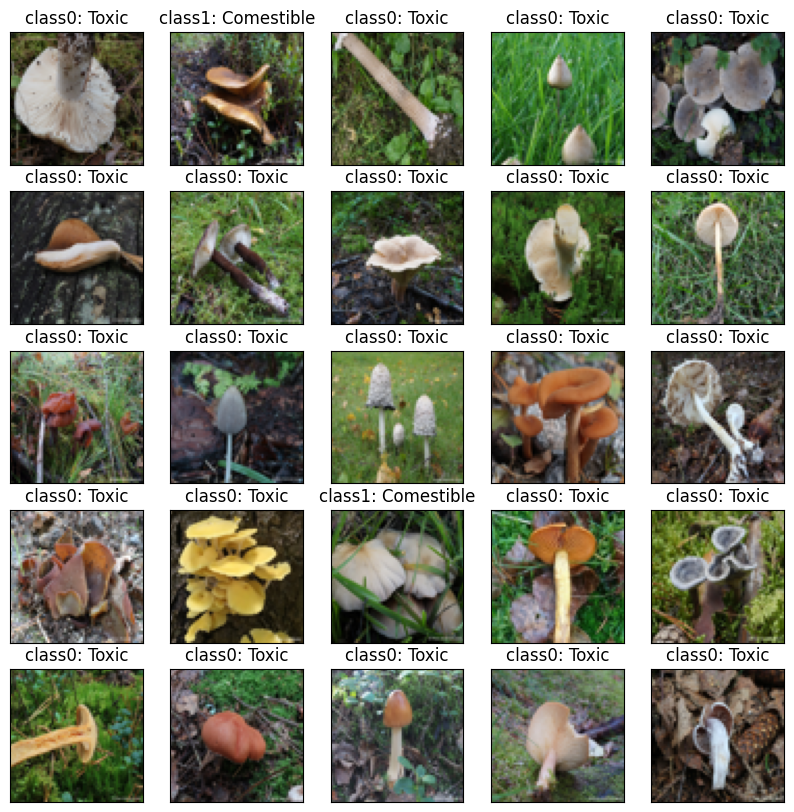

In [ ]:
if __name__ == "__main__":
    # visualize the picture in x_train
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(X[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f"class{np.argwhere(y[i] == 1)[0][0]}: {classes[np.argwhere(y[i] == 1)[0][0]]}")

In [ ]:
def Data_augmentation(img_shape):
    # Create a sequential model
    model = Sequential()

    # TODO 1.1
    # Build your own model with model.add() and following layers
    # Hint: you may consider using
        # RandomFlip(mode): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/
        # RandomRotation(factor): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/
        # RandomZoom(factor): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/
    model.add(RandomFlip(input_shape=img_shape, mode='horizontal'))
    model.add(RandomRotation(factor=0.2))
    model.add(RandomZoom(height_factor=0.2, width_factor=0.2))

    return model

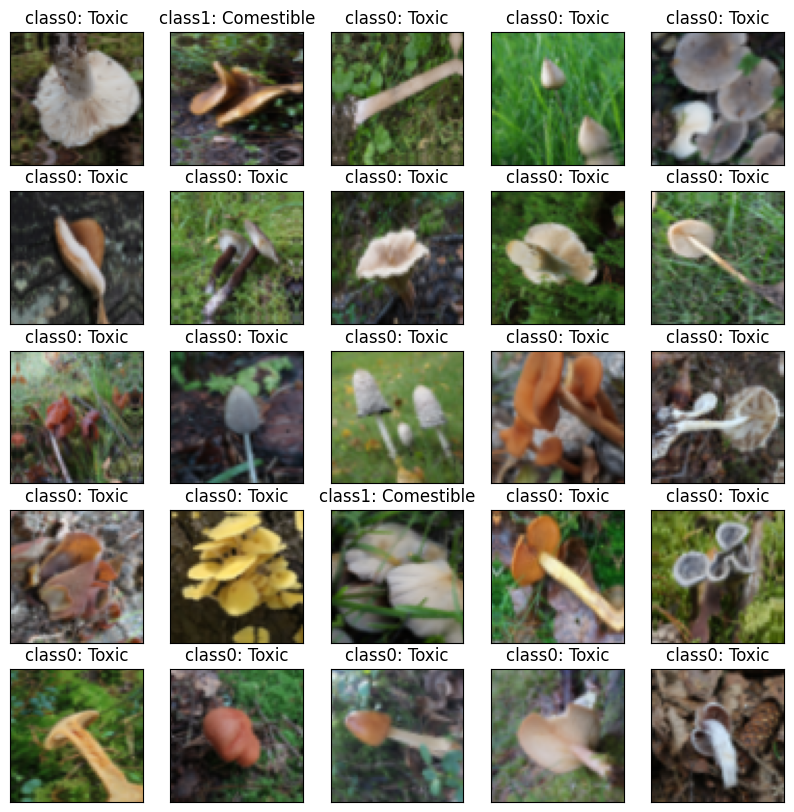

In [ ]:
data_aug = Data_augmentation(img_shape=(64, 64, 3))

if __name__ == "__main__":
    # visualize the augmented images
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(data_aug(X[i: i+1])[0])
        plt.xticks([])
        plt.yticks([])
        plt.title(f"class{np.argwhere(y[i] == 1)[0][0]}: {classes[np.argwhere(y[i] == 1)[0][0]]}")

In [ ]:
def myModel(img_shape, data_aug):
    # Create a sequential model
    model = Sequential()

    # Add the data augmentation layer
    model.add(data_aug)

    # TODO 2.1
    # Build your own model with model.add() and following layers
    # Hint: you may consider using
        # Conv2D(filters, kernel_size, activation='relu'): https://keras.io/api/layers/convolution_layers/convolution2d/
        # MaxPooling2D(pool_size): https://keras.io/api/layers/pooling_layers/max_pooling2d/
        # Flatten(): https://keras.io/api/layers/reshaping_layers/flatten/
        # Dense(units, activation='relu'): https://keras.io/api/layers/core_layers/dense/
        # Dropout(rate): https://keras.io/api/layers/regularization_layers/dropout/
        # BatchNormalization(): https://keras.io/api/layers/normalization_layers/batch_normalization/
        # GlobalAveragePooling2D(): https://keras.io/api/layers/pooling_layers/global_average_pooling2d/

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
if __name__ == "__main__":
    # Create the model
    model = myModel(img_shape=(64, 64, 3), data_aug=data_aug)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Create a callback that saves the model's weights
    checkpointer = keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("models", "weights.hdf5"),
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True)

    # Train the model
    history = model.fit(X, y, epochs=20, batch_size=16, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 1.7671 - accuracy: 0.3221
Epoch 1: val_accuracy improved from -inf to 0.48970, saving model to models/weights.hdf5
625/625 [==============================] - 341s 541ms/step - loss: 1.7671 - accuracy: 0.3221 - val_loss: 1.4090 - val_accuracy: 0.4897
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - ETA: 0s - loss: 1.2758 - accuracy: 0.5325
Epoch 2: val_accuracy improved from 0.48970 to 0.58250, saving model to models/weights.hdf5
625/625 [==============================] - 309s 494ms/step - loss: 1.2758 - accuracy: 0.5325 - val_loss: 1.1432 - val_accuracy: 0.5825
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.6159
Epoch 3: val_accuracy improved from 0.58250 to 0.64650, saving model to models/weights.hdf5
625/625 [==============================] - 290s 464ms/step - loss: 1.0628 - accuracy: 0.6159 - val_loss: 0.9778 - val_accuracy: 0.6465
Epoch 4/30
625/625 [==============================] - ETA: 0s - loss: 0.9486 - accuracy: 0.6620
Epoch 4: val_accuracy improved from 0.64650 to 0.68160, saving model to models/weights.hdf5
625/625 [==============================] - 287s 460ms/step - loss: 0.9486 - accuracy: 0.6620 - val_loss: 0.8851 - val_accuracy: 0.6816
Epoch 5/30
625/625 [======================

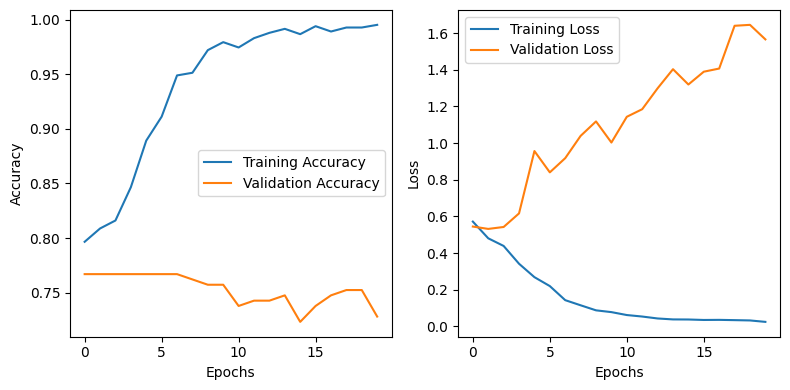

In [ ]:
if __name__ == "__main__":
    let_me_see(history)